# Descrição do Projeto

O Projeto tem como objetivo analisar, tratar e prever se uma pessoa possui problemas cardíacos a partir de uma série de dados coletados, além de identificar os principais fatores que contribuem para isso.

Dataset utilizado: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## Legenda

    *HeartDisease: Pessoas que já relataram ter doença coronariana (CHD) ou infarto do miocárdio (MI);
    
    *BMI: Índice de Massa Corporal (IMC);
    
    *Smoking: Fumou pelo menos 100 cigarros em toda a sua vida;
    
    *AlcoholDrinking: Consumidores pesados de álcool (homens adultos que consomem mais de 14 bebidas por semana e mulheres                           adultas que consomem mais de 7 bebidas por semana)
    
    *Stroke: Já teve um Acidente Vascular Cerebral (AVC);
    
    *PhysicalHealth: Doenças e lesões físicas, por quantos dias nos últimos 30;
    
    *MentalHealth: Quantos dias nos últimos 30 dias sua saúde mental não estava boa;
    
    *DiffWalking: Possui dificuldade séria para caminhar ou subir escadas;
    
    *Sex: homem ou mulher;
    
    *AgeCategory: Idade, separada em 14 categorias;
    
    *Race: Raça/etnia;
    
    *Diabetic: Possui Diabetes;
    
    *PhysicalActivity: Fez atividades físicas ou exercício nos últimos 30 dias;
    
    *GenHealth: Como a pessoa acretida estar sua saúde;
    
    *SleepTime: Quantas horas de sono você tem em um período de 24 horas;
    
    *Asthma: Possui asma;
    
    *KidneyDisease: Possui doença renal (excluindo pedras nos rins, infecção urinária ou incontinência);
    
    *SkinCancer: Teve câncer de pele.

In [1]:
#Importações utiliazadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visão geral do dataset

In [2]:
dataset = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
len(dataset)

319795

In [4]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
print(dataset.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


### Tratamento dos Dados

Problemas Encontrados:

   1) A grande maioria das colunas categóricas está codificada como 'Yes' ou 'No', o que pode trazer dificuldades na plotagem de alguns gráficos e na utilização de algoritmos de aprendizado de máquina.
   2) A coluna "Sex" está separada como 'Female' e 'Male', o que também pode gerar problemas na análise e modelagem, pois é preferível que essa informação seja codificada numericamente.
   3) A coluna "AgeCategory" está separada em categorias, mas de forma não numérica, pois contém caracteres. Isso pode dificultar sua utilização em algoritmos que requerem valores numéricos.
   4) As colunas "Race" e "GenHealth" estão com valores de texto (strings), o que pode ser problemático em algumas análises e algoritmos que exigem valores numéricos para processamento.
   5) A Coluna Diabetic possui outros valores além de 'Yes' e 'No'.

In [3]:
# Resolvendo o problema dos 'Yes' e 'No', substituindo 'No' por 0 e 'Yes' por 1
dicionarioYN = {'Yes': 1, 'No': 0}
for column in dataset.columns:
    if 'Yes' in dataset[column].values or 'No' in dataset[column].values:
        dataset[column] = dataset[column].replace(dicionarioYN)

# Resolvendo o problema da coluna 'Diabetic', substituindo as outras classificações identificadas
dicionarioDiabetic = {'No, borderline diabetes': 2, 'Yes (during pregnancy)': 3}
dataset['Diabetic'] = dataset['Diabetic'].replace(dicionarioDiabetic)

# Resolvendo o problema da coluna 'Sex', substituindo 'Female' por 0 e 'Male' por 1
dicionarioSex = {'Female': 0, 'Male': 1}
dataset['Sex'] = dataset['Sex'].replace(dicionarioSex)

# Resolvendo o problema da coluna 'GenHealth', criando uma classificação de forma crescente do pior para o melhor em outra coluna
dicionarioGenHealth = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
GenHealth_class = dataset['GenHealth'].map(dicionarioGenHealth)
dataset.insert(loc=dataset.columns.get_loc('GenHealth')+1, column='GenHealth_class', value=GenHealth_class)

# Resolvendo o problema da coluna 'Ages', substituindo as categorias pela media de idade da categoria
def idade_media(categoria):
    if '-' in categoria:
        lower, upper = categoria.split('-')
        return int((int(lower) + int(upper)) / 2)
    else:
        return 80
dataset['AgeCategory'] = dataset['AgeCategory'].apply(idade_media)

# Resolvendo o problema da coluna 'Race', criando uma nova coluna com um 'id' de cada valor unico
dicionarioRace = {'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Other': 4, 'Hispanic': 5}
Race_id = dataset['Race'].map(dicionarioRace)
dataset.insert(loc=dataset.columns.get_loc('Race')+1, column='Race_id', value=Race_id)

C:\Users\kauan\AppData\Local\Temp\ipykernel_21584\3830602938.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Yes' in dataset[column].values or 'No' in dataset[column].values:


In [8]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Race_id,Diabetic,PhysicalActivity,GenHealth,GenHealth_class,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,White,0,1,1,Very good,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,0,1,Very good,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,White,0,1,1,Fair,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,White,0,0,0,Good,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,White,0,0,1,Very good,3,8.0,0,0,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Race_id           319795 non-null  int64  
 12  Diabetic          319795 non-null  int64  
 13  PhysicalActivity  319795 non-null  int64  
 14  GenHealth         319795 non-null  object 
 15  GenHealth_class   319795 non-null  int64  
 16  SleepTime         31

### Vizualizando os dados

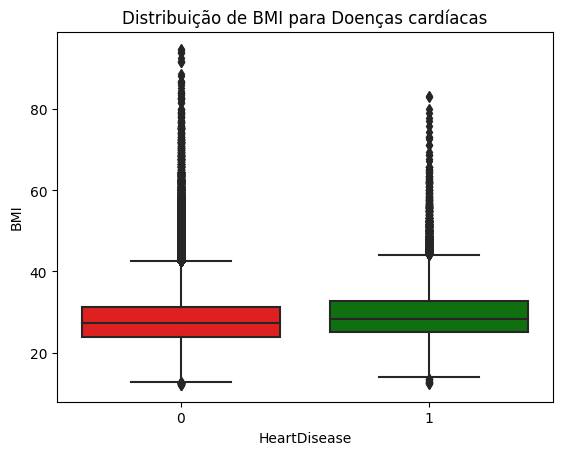

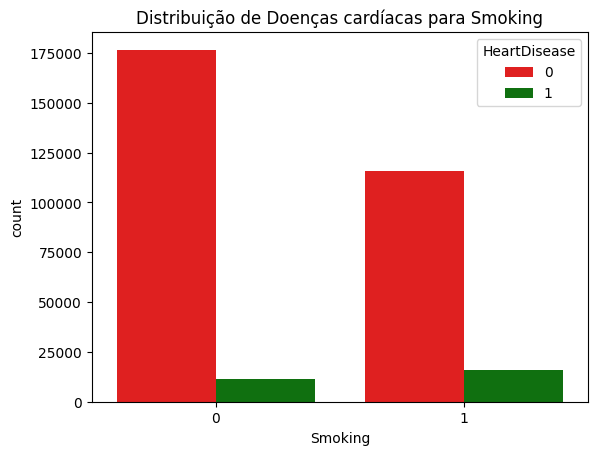

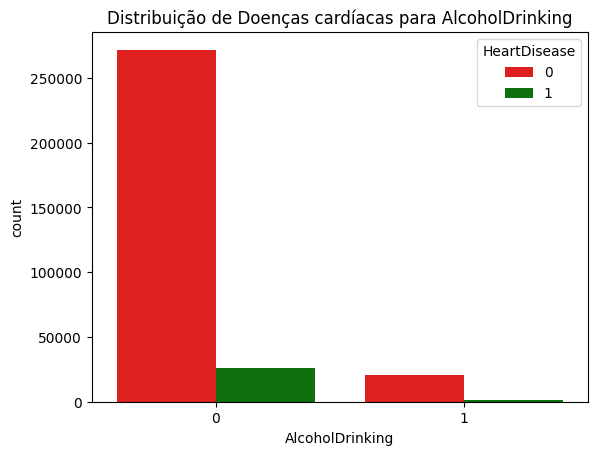

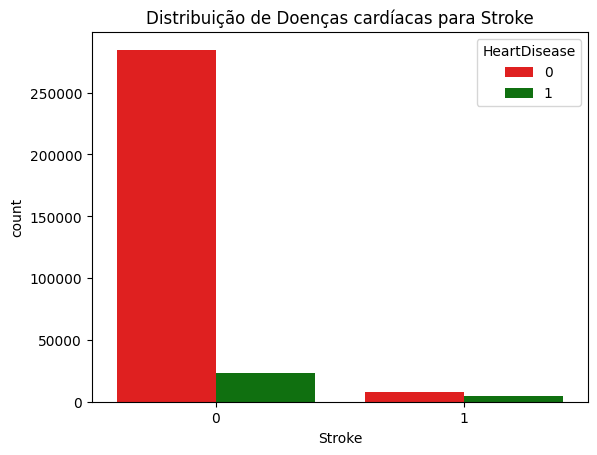

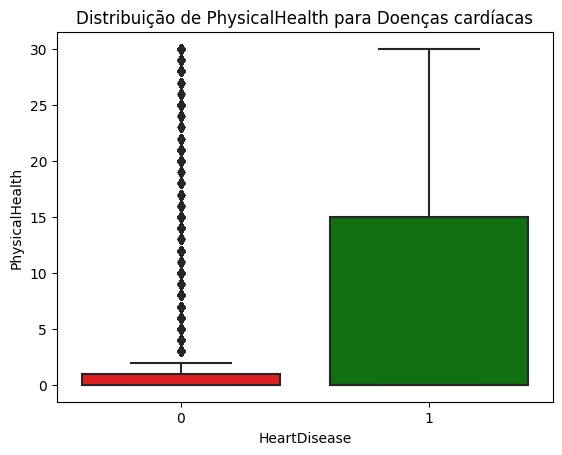

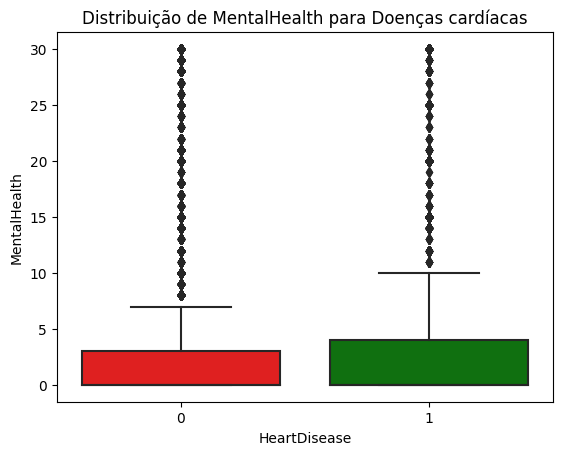

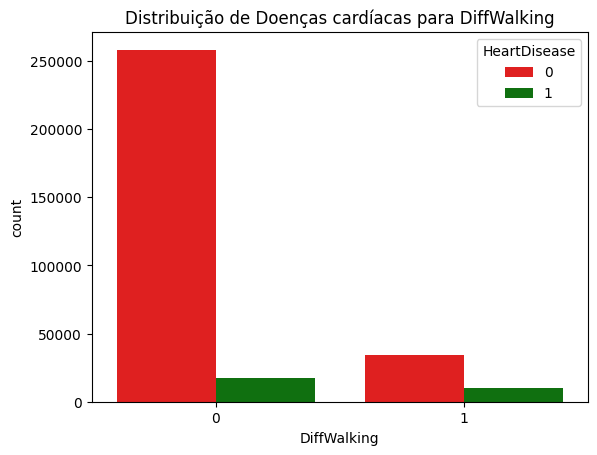

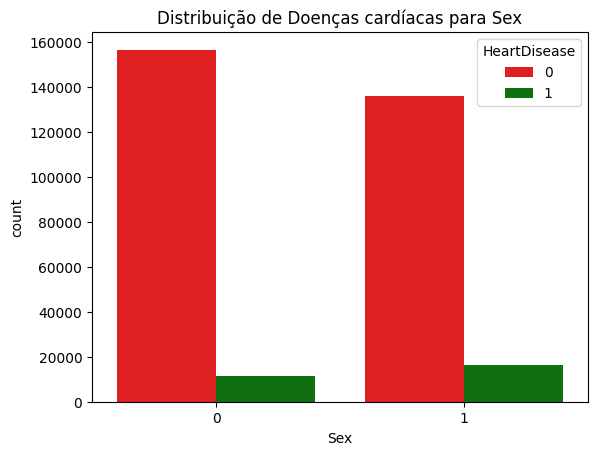

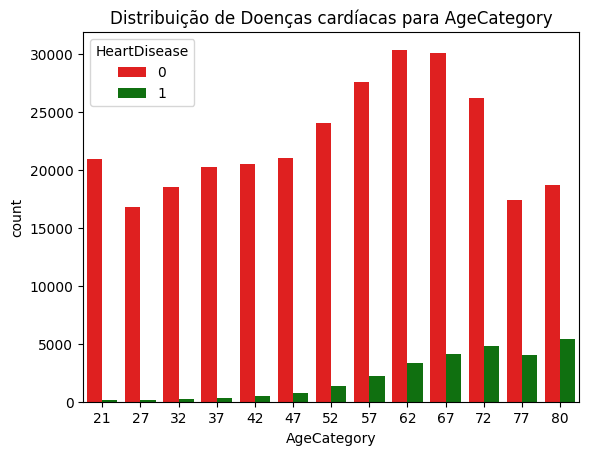

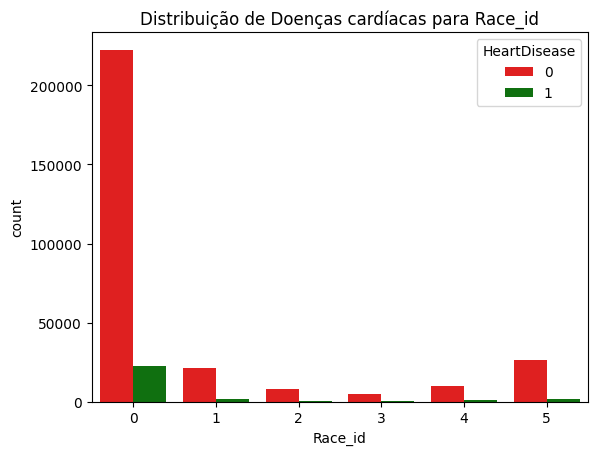

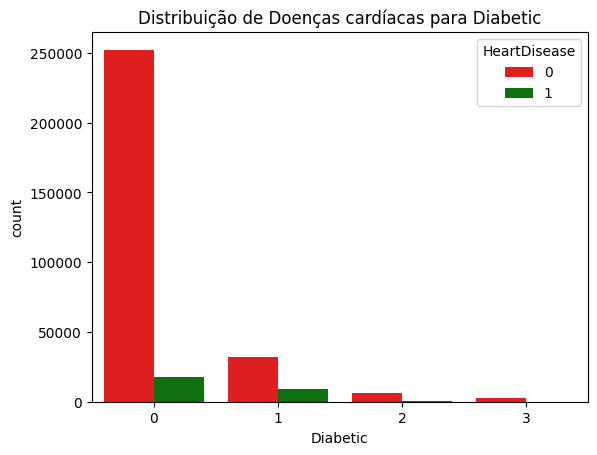

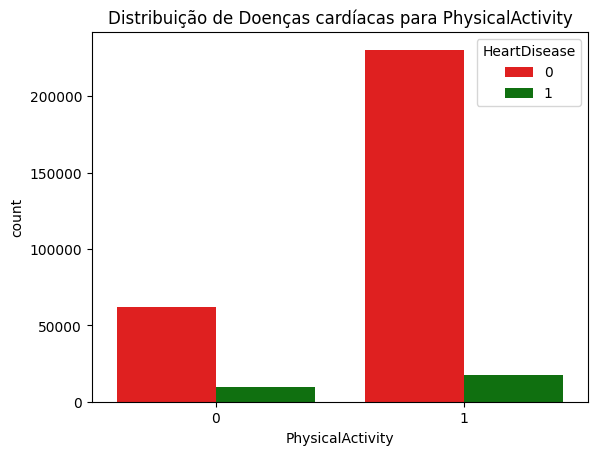

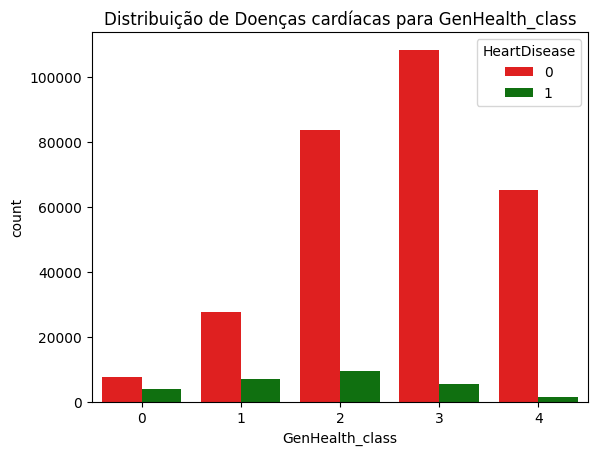

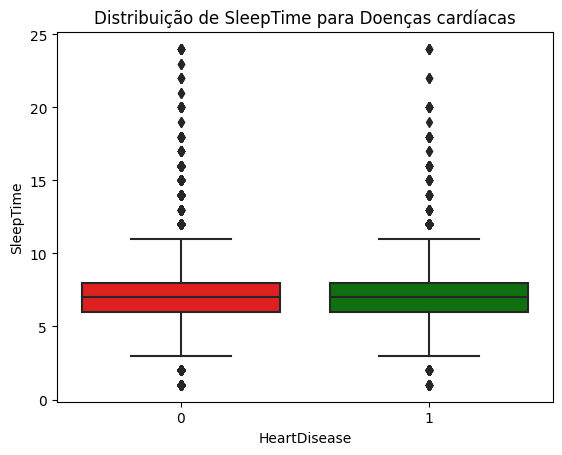

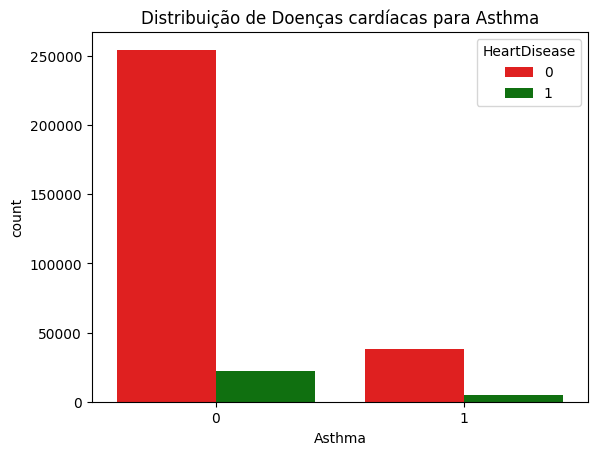

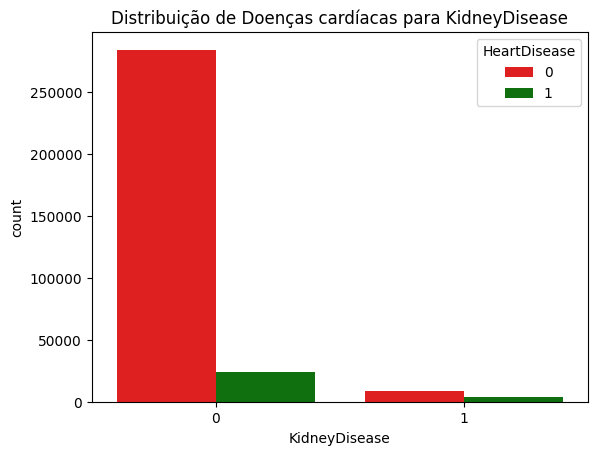

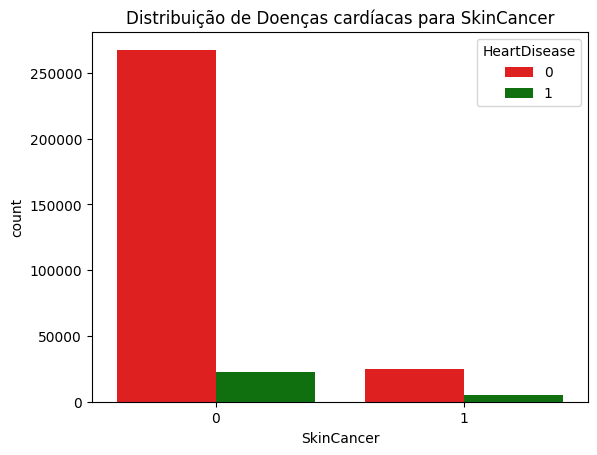

In [10]:
colunas = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
             'Race_id', 'Diabetic', 'PhysicalActivity', 'GenHealth_class', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Loop para criar gráficos para cada colunas
for columns in colunas:
    # Gráfico para variáveis categorizadas com 0,1,2...
    if dataset[columns].dtype == 'int64':
        sns.countplot(x=columns, hue='HeartDisease', data=dataset, palette=['red', 'green'])
        plt.title(f'Distribuição de Doenças cardíacas para {columns}')
        plt.show()
    
    # Gráfico para variáveis floats
    else:
        sns.boxplot(x='HeartDisease', y=columns, data=dataset, palette=['red', 'green'])
        plt.title(f'Distribuição de {columns} para Doenças cardíacas')
        plt.show()

C:\Users\kauan\AppData\Local\Temp\ipykernel_1432\4185999311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = dataset.corr()


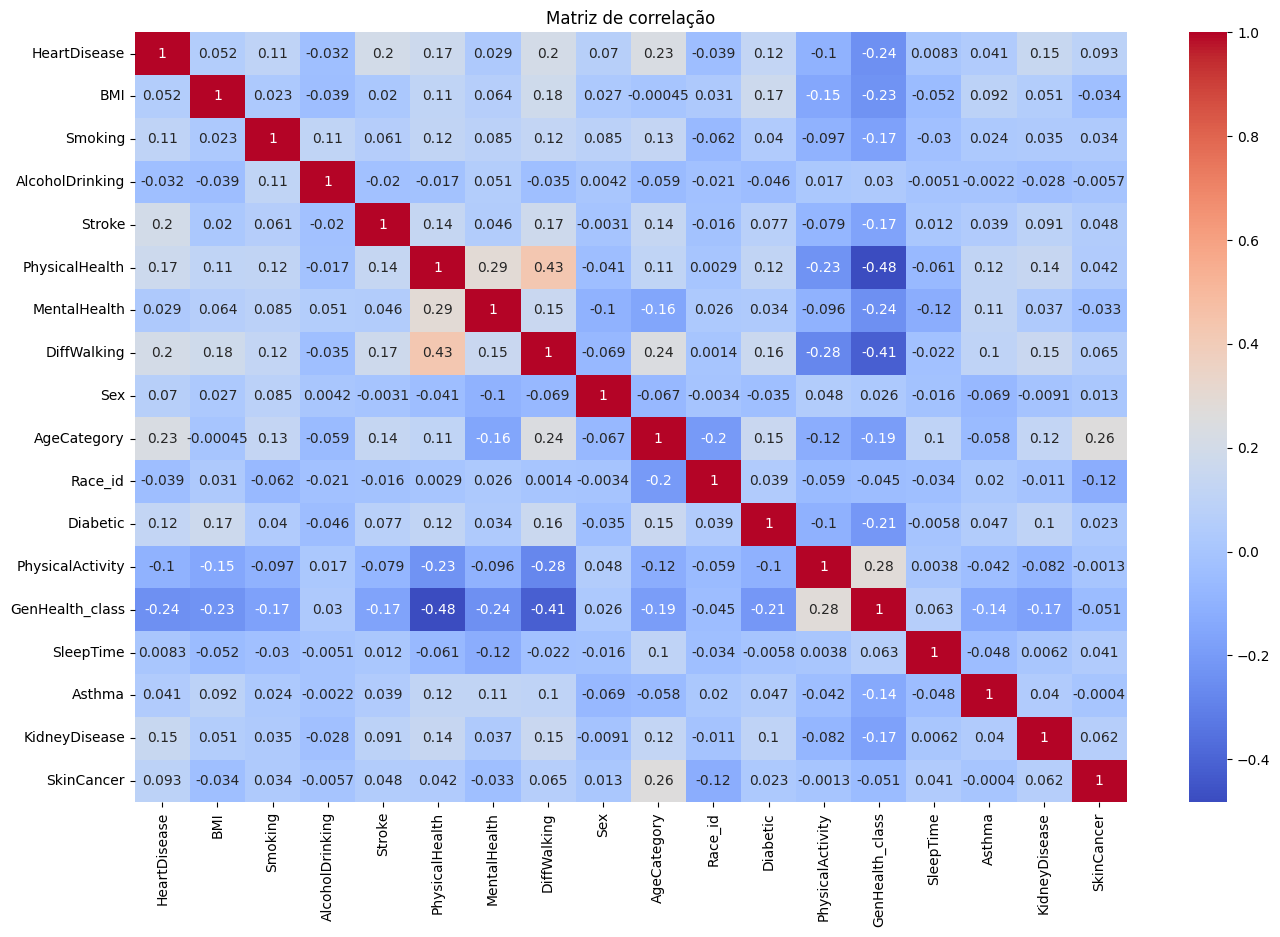

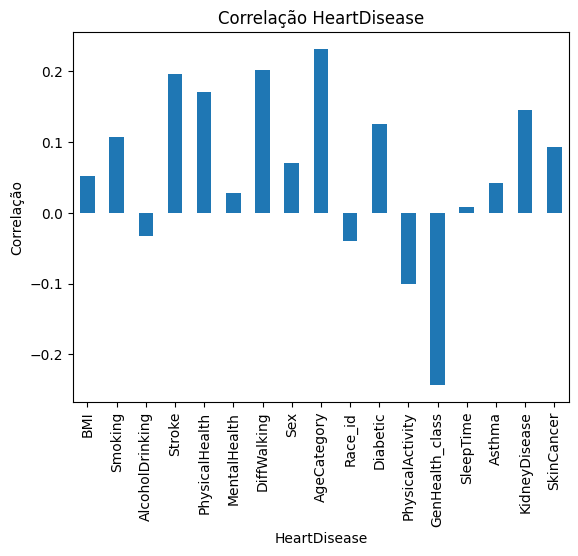

In [11]:
matriz_correlacao = dataset.corr()

# Plote da matriz de correlação
plt.figure(figsize=(16, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

# matriz de correlação com HeartDisease
correlacao = matriz_correlacao['HeartDisease'].drop('HeartDisease')
correlacao.plot(kind='bar')
plt.title('Correlação HeartDisease')
plt.ylabel('Correlação')
plt.xlabel('HeartDisease')
plt.show()

#### Oque podemos analisar com base nos graficos acima:

   1) A idade é o principal fator que contribui para doenças cardíacas. Quanto maior a idade, maior a chance de possuir a    doença;   
   2) Se a pessoa já teve AVC, possui problemas em caminhar, demora para se recuperar de doenças/lesões, ela possui maiores chances de possuir doenças cardíacas. 
   3) Doenças renais e diabetes podem ser fatores relevantes.
   4) Álcool e raça parecem não contribuir para doenças cardíacas.
   5) As pessoas não conseguem identificar se possuem ou não esse tipo de doença.  
   6) Vale ressaltar que, apesar da matriz de correlação apontar uma baixa relação entre doenças cardíacas e atividades físicas, ao usar uma tabela cruzada, percebe-se que quase 14% das pessoas que não fazem atividades físicas possuem doenças cardíacas. Por outro lado, apenas 7% das pessoas que fazem atividades físicas possuem doenças cardíacas. Conclui-se que não fazer atividades físicas aumenta suas chances de ter uma doença cardíaca.
   7) O restante das variáveis também contribuem para doenças cardíacas, porém de maneira menos significativa.
        

In [12]:
tabela_cruzada = pd.crosstab(dataset['HeartDisease'], dataset['PhysicalActivity'])
print(tabela_cruzada)

PhysicalActivity      0       1
HeartDisease                   
0                 61954  230468
1                  9884   17489


### Machine Learning
    
   Com o objetivo de tentar prever se uma pessoa possui ou não doenças cardíacas, serão utilizados modelos de machine learning para fazer essas previsões com base nos dados coletados. Os modelos escolhidos foram Regressão Logística, Árvore de Decisão, Floresta Aleatória e Regressão Linear.

In [4]:
# Importações Utilizadas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

#### Dados comuns entre os modelos

In [48]:
# Para evitar a complexidade e o risco de overfitting eu irei utilizar somente as variaveis que possuem uma correlação 
# relevante com HeartDisease

ColunasRelevantes = ['BMI', 'Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'Asthma',
                     'KidneyDisease', 'SkinCancer']

x = dataset[ColunasRelevantes]
y = dataset['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

#### Regressão Logistica

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87649
           1       0.50      0.08      0.14      8290

    accuracy                           0.91     95939
   macro avg       0.71      0.54      0.55     95939
weighted avg       0.88      0.91      0.88     95939



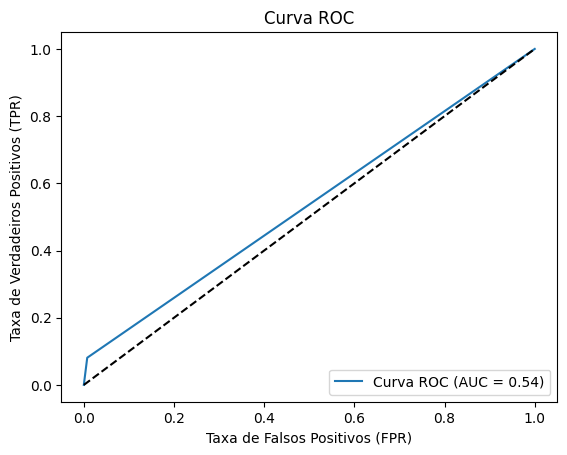

In [49]:
logelModel = LogisticRegression(max_iter=1000)
logelModel.fit(X_train, y_train)

predict = logelModel.predict(X_test)
print(classification_report(y_test, predict))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


####  Regressão Linear

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87649
           1       0.64      0.02      0.04      8290

    accuracy                           0.91     95939
   macro avg       0.78      0.51      0.50     95939
weighted avg       0.89      0.91      0.88     95939



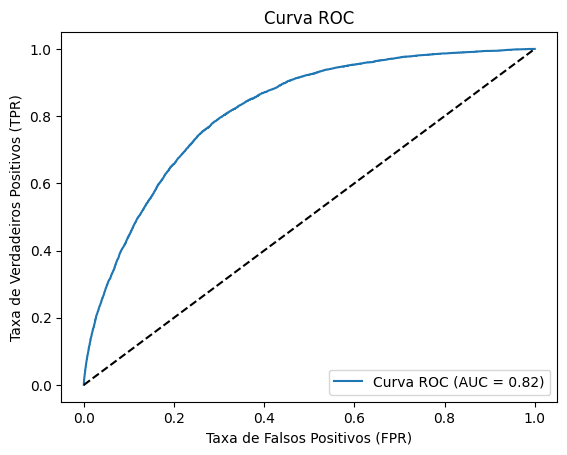

In [50]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

predict = regression_model.predict(X_test)
predictions_discretas = (predict >= 0.5).astype(int)
print(classification_report(y_test, predictions_discretas))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#### Árvores

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     87649
           1       0.24      0.20      0.22      8290

    accuracy                           0.88     95939
   macro avg       0.58      0.57      0.58     95939
weighted avg       0.87      0.88      0.87     95939



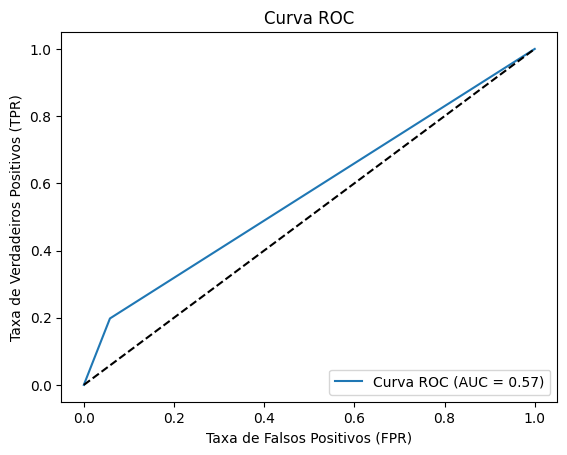

In [51]:
arvore_decisao = DecisionTreeClassifier()
arvore_decisao.fit(X_train, y_train)

predict = arvore_decisao.predict(X_test)
print(classification_report(y_test, predict))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     87649
           1       0.30      0.15      0.20      8290

    accuracy                           0.90     95939
   macro avg       0.61      0.56      0.57     95939
weighted avg       0.87      0.90      0.88     95939



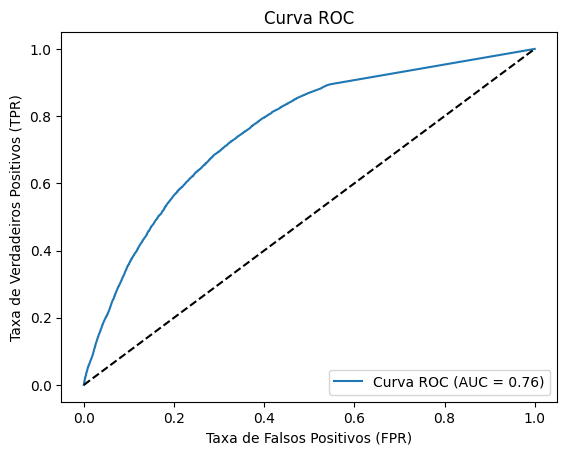

In [18]:
arvore_rand = RandomForestRegressor(n_estimators=500)
arvore_rand.fit(X_train, y_train)

predict = arvore_rand.predict(X_test)
predictions_discretas = (predict >= 0.5).astype(int)
print(classification_report(y_test, predictions_discretas))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


### Conclusões 

   No geral, todos os modelos demonstraram uma precisão alta na classificação de pessoas que não possuem doenças, porém tiveram um péssimo desempenho na classificação de pessoas com doenças. O principal fator que contribui para isso é o desequilíbrio dos dados, onde há dez vezes mais dados sobre pessoas que não possuem doenças do que as que possuem. Percebe-se isso através do suporte no classification_report. Porém, vale ressaltar que o modelo de Random Forest conseguiu se adaptar muito bem a esse desequilíbrio e obteve uma média razoável e o modelo de Regressão Linear foi o que melhor conseguiu prever corretamente as pessoas que possuem doenças cardíacas e manteve o alto desempenho em prever as pessoas que não possuem, assim obtendo a melhor curva ROC entre todos os outros.

LogisticRegression
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8966
           1       0.74      0.75      0.74      8246

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.75      0.75      0.75     17212



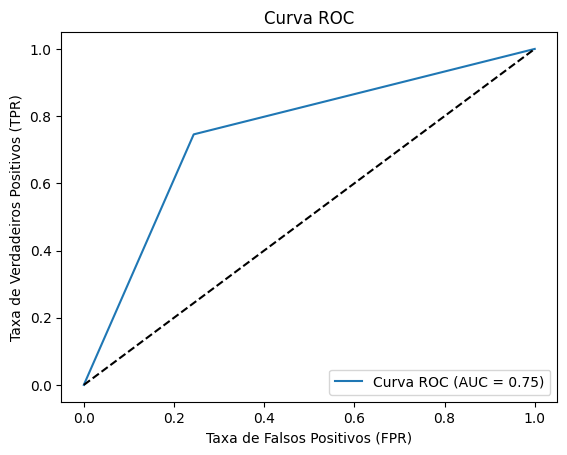

LinearRegression
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      8966
           1       0.74      0.75      0.74      8246

    accuracy                           0.75     17212
   macro avg       0.75      0.75      0.75     17212
weighted avg       0.75      0.75      0.75     17212



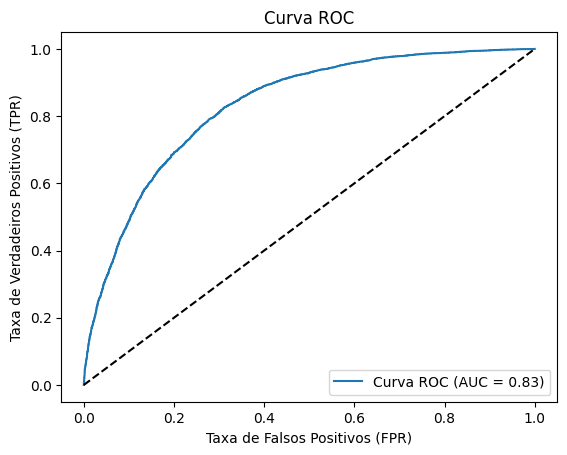

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      8966
           1       0.67      0.63      0.65      8246

    accuracy                           0.67     17212
   macro avg       0.67      0.67      0.67     17212
weighted avg       0.67      0.67      0.67     17212



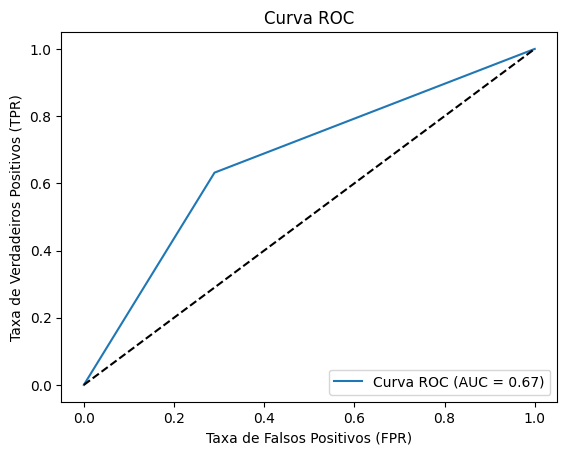

RandomForestRegressor
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      8966
           1       0.69      0.72      0.70      8246

    accuracy                           0.71     17212
   macro avg       0.71      0.71      0.71     17212
weighted avg       0.71      0.71      0.71     17212



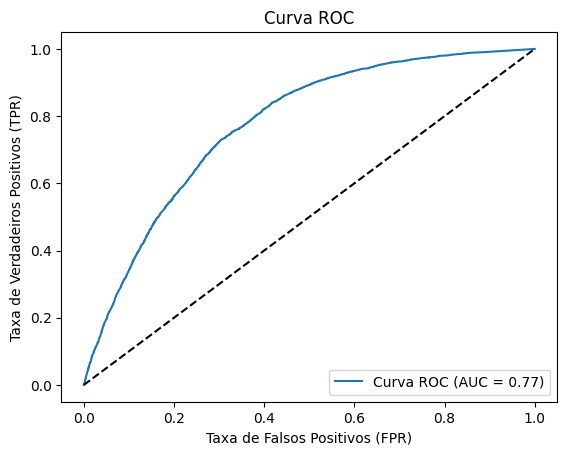

In [60]:
heart_disease_1 = dataset[dataset['HeartDisease'] == 1]

# Selecionar 30.000 linhas aleatórias em que "HeartDisease" é igual a 0
heart_disease_0 = dataset[dataset['HeartDisease'] == 0].sample(n=30000, random_state=42)

# Concatenar os DataFrames em um novo DataFrame
dataset_test = pd.concat([heart_disease_1, heart_disease_0])
len(novo_dataset)

x = dataset_test[ColunasRelevantes]
y = dataset_test['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

logelModel = LogisticRegression(max_iter=1000)
logelModel.fit(X_train, y_train)

predict = logelModel.predict(X_test)
print('LogisticRegression')
print(classification_report(y_test, predict))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

predict = regression_model.predict(X_test)
predictions_discretas = (predict >= 0.5).astype(int)
print('LinearRegression')
print(classification_report(y_test, predictions_discretas))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

arvore_decisao = DecisionTreeClassifier()
arvore_decisao.fit(X_train, y_train)

predict = arvore_decisao.predict(X_test)
print('DecisionTreeClassifier')
print(classification_report(y_test, predict))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


arvore_rand = RandomForestRegressor(n_estimators=500)
arvore_rand.fit(X_train, y_train)

predict = arvore_rand.predict(X_test)
predictions_discretas = (predict >= 0.5).astype(int)
print('RandomForestRegressor')
print(classification_report(y_test, predictions_discretas))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      8966
           1       0.68      0.70      0.69      8246

    accuracy                           0.70     17212
   macro avg       0.70      0.70      0.70     17212
weighted avg       0.70      0.70      0.70     17212



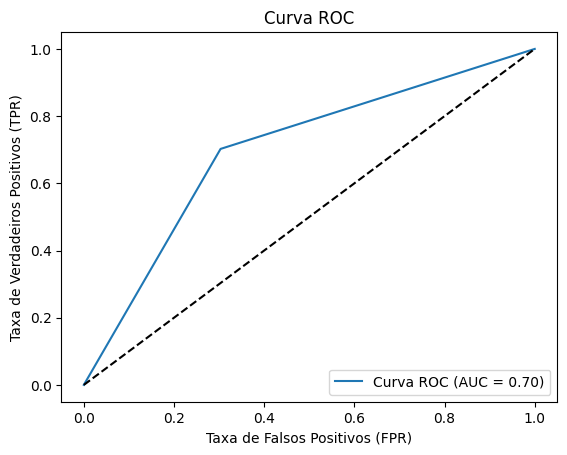

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)
predictions_discretas = (predict >= 0.5).astype(int)
print('RandomForestClassifier')
print(classification_report(y_test, predictions_discretas))
fpr, tpr, thresholds = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()